In [1]:
cd .. 

/home/jovyan/Project-final-4


In [2]:
run __init__.py

In [7]:
%run src/load_data.py

In [8]:
!pip install tqdm --quiet

In [9]:
from sklearn.metrics import accuracy_score, f1_score

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
mglearn.plot_improper_preprocessing.plot_improper_processing()

In [54]:
features = housing_df.drop('SalePrice',axis=1)
target = housing_df['SalePrice']

In [55]:
numeric_col = housing_df.select_dtypes(exclude={'category'})
categorical_col = [i for i in features.columns if i not in numeric_col]

In [56]:
dummies = pd.get_dummies(features, columns=categorical_col)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dummies, target, random_state=42)

Decision Tree

In [58]:
dtree = DecisionTreeRegressor()

In [59]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [60]:
dtree.score(X_train,y_train)

1.0

In [61]:
dtree.score(X_test,y_test)

0.72961545624449564

Lasso

In [62]:
Lasso = make_pipeline(Lasso())

In [63]:
Lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [64]:
Lasso.score(X_test,y_test)

0.79337527873592828

Ridge

In [ ]:
Ridge = make_pipeline(StandardScaler(), Ridge())

In [ ]:
Ridge.fit(X_train, y_train)

In [ ]:
Ridge.score(X_train, y_train)

In [ ]:
Ridge.score(X_test,y_test)

KNN

In [67]:
KNeighborsRegressor = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [69]:
KNeighborsRegressor.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))])

In [70]:
KNeighborsRegressor.score(X_train, y_train)

0.83554123961552373

In [73]:
KNeighborsRegressor.score(X_test, y_test)

0.76829152719623617

SVM

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [81]:
svc = SVC()

In [82]:
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
svc.score(X_train_scaled, y_train)

0.31433823529411764

In [84]:
svc.score(X_test_scaled, y_test)

0.016528925619834711

Decision Tree Boosting

In [90]:
dtree = DecisionTreeRegressor(max_depth=1)
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train), dtree.score(X_test, y_test)

(0.35058309692713385, 0.42706654477934147)

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
dtree = GradientBoostingRegressor()
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train), dtree.score(X_test, y_test)

(0.96977348887044224, 0.86153391250991052)

In [94]:
dtree = RandomForestRegressor(max_depth=2)
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train), dtree.score(X_test, y_test)

(0.6699957173531188, 0.65522942174209164)

In [104]:
train_scores = list()
test_scores = list()
for depth in range(1,21):
    dtree = RandomForestRegressor(max_depth=depth)
    dtree.fit(X_train, y_train)
    train_scores.append(dtree.score(X_train, y_train))
    test_scores.append(dtree.score(X_test, y_test))

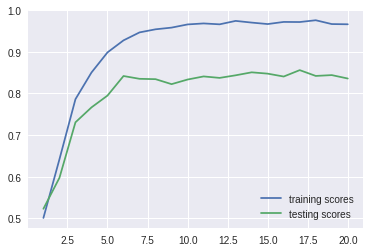

In [105]:
plt.plot(range(1,21), train_scores, label='training scores')
plt.plot(range(1,21), test_scores, label='testing scores')
plt.legend()

In [103]:
dtree.predict_proba(X_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, StratifiedShuffleSplit, train_test_split

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [109]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
knc_params = {
    'n_neighbors': range(5,51,5)
}

In [112]:
knc_gs = GridSearchCV(KNeighborsRegressor(), param_grid= knc_params, cv=5)

TypeError: 'Pipeline' object is not callable

In [ ]:
knc_gs.fit(X_train_scaled, y_train)

In [ ]:
cv_results = pd.DataFrame(knc_gs.cv_results_)
cv_results.head()

In [ ]:
cv_results.sort_values('mean_test_score', ascending=False).head()

In [ ]:
knc_gs.best_score_